In [1]:
#Mounting Google Drive Locally

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#set google drive path from personal google drive
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv_folder/employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


**DATA INFO**

1)Year Type Fiscal (July through June) or Calendar (January through December)

2)Year An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.

3)Organization Group Code Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

4)Organization Group Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

5)Department Code Departments are the primary organizational unit used by the City and County of San Francisco. Examples include

6)Code Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

7)Union Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

8)Job Family Code Job Family combines similar Jobs into meaningful groups.

9)Job Family Job Family combines similar Jobs into meaningful groups.

10)Job Code Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.

11)Job Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.

12)Employee Identifier Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the Employee Compensation report hosted on openbook.sfgov.org, but that report does show one row for each employee. Employee ID has been included here to allow users to reconstruct the original report. Note that each employee’s identifier will change each time this dataset is updated, so comparisons by employee across multiple versions of the dataset are not possible.

13)Salaries Normal salaries paid to permanent or temporary City employees.

14)Overtime Amounts paid to City employees working in excess of 40 hours per week.

15)Other Salaries Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments.

16)Total Salary The sum of all salaries paid to City employees.

17)Retirement City contributions to employee retirement plans.

18)Health and Dental City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.

19)Other Benefits Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.

20)Total Benefits The sum of all benefits paid to City employees.

21)Total Compensation The sum of all salaries and benefits paid to City employees.

**EDA**

In [5]:
data.shape

(683277, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [7]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [9]:
#Unique Values in the data frame

def fraction_unique(x):
    return len(data[x].unique())

number_unique_vals={x:fraction_unique(x) for x in data.columns}

number_unique_vals

#'click_time' has the highest volume of unique values

{'Department': 110,
 'Department Code': 61,
 'Employee Identifier': 309750,
 'Health and Dental': 209969,
 'Job': 1350,
 'Job Code': 1210,
 'Job Family': 59,
 'Job Family Code': 59,
 'Organization Group': 7,
 'Organization Group Code': 7,
 'Other Benefits': 496200,
 'Other Salaries': 307854,
 'Overtime': 262033,
 'Retirement': 451716,
 'Salaries': 498512,
 'Total Benefits': 616499,
 'Total Compensation': 658692,
 'Total Salary': 615223,
 'Union': 130,
 'Union Code': 71,
 'Year': 8,
 'Year Type': 2}

In [10]:
#Column Types
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [11]:
#dropping rows having missing values
data = data.dropna()
data.shape

#a total of 358 rows were dropped

(682919, 22)

In [12]:
#filter out objects
data1=data.copy()
data1 = data1.select_dtypes(include = ['float64', 'int64'])
data1.head()
#trying to see what would make sense to use in a scatter plot

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,21.0,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,21.0,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,21.0,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,21.0,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,21.0,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


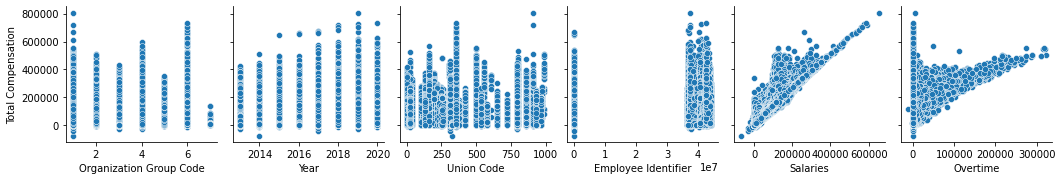

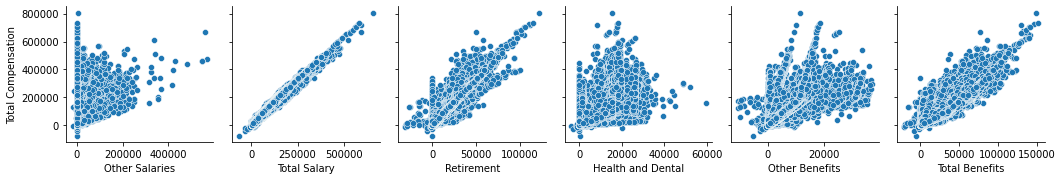

In [13]:
for s in range(0, 11, 6):
    sns.pairplot(data=data1,
                x_vars=data1.columns[s:s+6],
                y_vars=['Total Compensation'])

In [14]:
# 'Organization Group Code' could be a good independent variable
data1['Organization Group Code'].value_counts()
#I'm planning on using 'Total Compensation' as the dependent variable and it doesn't
#seem like I can use many of the other columns because they are dependent of each other.
#that leaves a few options left such as 'Year', 'Union Code', 
#'Employer Identifier' (this one is useless because it changes all the time), and
#'Organization Group Code'

2    215688
4    150106
1    130982
6     62123
5     61860
3     61678
7       482
Name: Organization Group Code, dtype: int64

In [15]:
# 'Year' could be a good independent variable
data1['Year'].value_counts()

2017    129815
2019     89053
2016     88299
2015     86067
2018     85638
2014     82291
2013     79380
2020     42376
Name: Year, dtype: int64

In [16]:
#to address ccolor on the scatter plot, it seems best to use one that has two options
# 'Year Type' provides two options: Fiscal/Calendar
data['Year Type'].value_counts()

Fiscal      384892
Calendar    298027
Name: Year Type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

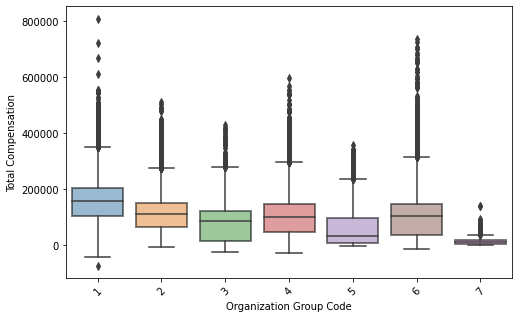

In [17]:
#use box and whiskers to catch trends and outliers for 'Organization Group Code'
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Organization Group Code', y='Total Compensation', data=data1)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#many outliers, therefore we cannot rid of outliers
#Also, certain organizations have higher salaries from others

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

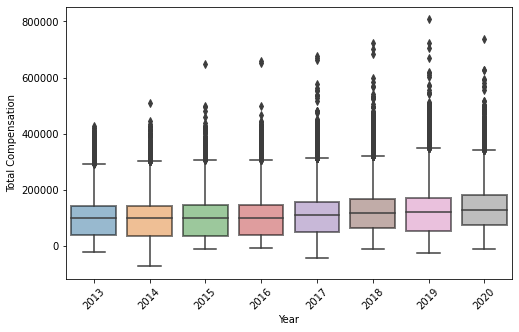

In [18]:
#use box and whiskers to catch trends and outliers for 'Year'
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Year', y='Total Compensation', data=data1)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#many outliears but it seems to be consistent over the years, 
#maybe the same people are the ones with the high salaries and their
#salaries increase over time.
#No outliers will be removed because it will not be a good representation of the data.

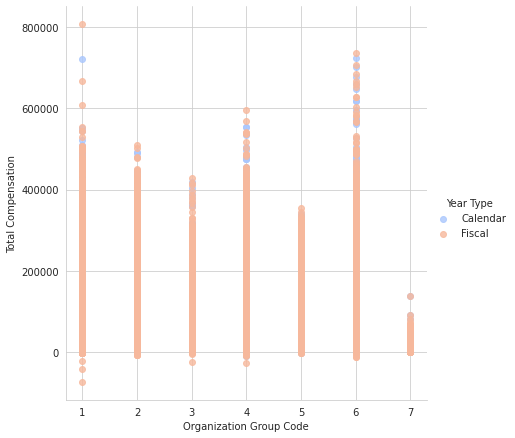

In [19]:
#will do a scatter plot and compare 'Organization Group Code' with 'Unio Code'
sns.set_style('whitegrid')
sns.lmplot('Organization Group Code','Total Compensation',data=data, hue='Year Type',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
#not as scatter as I would hope for

In [20]:
# 'Year' could be a good independent variable
data['Organization Group'].value_counts()

Public Works, Transportation & Commerce     215688
Community Health                            150106
Public Protection                           130982
General Administration & Finance             62123
Culture & Recreation                         61860
Human Welfare & Neighborhood Development     61678
General City Responsibilities                  482
Name: Organization Group, dtype: int64

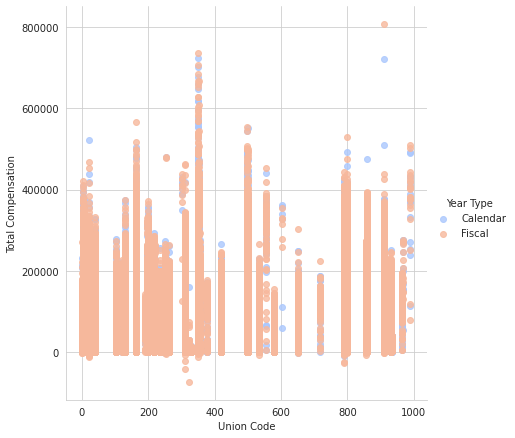

In [21]:
#scatter plot of 'Union Code'
sns.set_style('whitegrid')
sns.lmplot('Union Code','Total Compensation',data=data, hue='Year Type',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
#A bit more scatter and probably the better choice
#will end up using Union code for k-means

**K-Means**

In [22]:
#Label columns to rid unwated columns from copy paste

data1.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [23]:
#rid unwanted columns

data2=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits'], axis=1)
data2.head()

,Union Code,Total Compensation
0,21.0,85281.78
1,21.0,79895.32
2,21.0,93649.71
3,21.0,134237.37
4,21.0,7512.31


In [24]:
from sklearn.cluster import KMeans

# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data2)

#n-cluster center points
print(kmeans.cluster_centers_)

[[   545.54567755  23618.84676037]
 [   452.46802229 115795.02446465]
 [   501.78092044 207912.10833709]]


In [25]:
#kmeans label array

y=kmeans.labels_
print(y)

[1 1 1 ... 1 2 2]


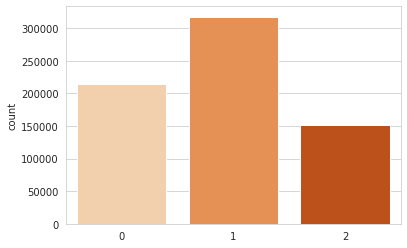

In [26]:
#Label counts for n_clusters=3 for 'Total Compensation' vs 'Union Code'

sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

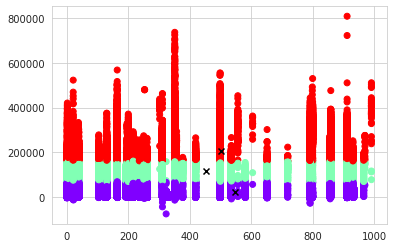

In [27]:
#K-means for n_clusters=3 for 'Total Compensation' vs 'Union Code'

plt.scatter(data2.iloc[:,0].values,data2.iloc[:,1].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#results show a huge gap in total wages
#will use a different comparison to see label counts

In [28]:
#getting rid of data not used in new k-means fit

data3=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Union Code'], axis=1)
data3.head()

#'Total Benefits' will be used, although if we mentioned that there could be a high 
#probability of dependence using the compensation columns, I believe 'Total Benefits'
#are the least coupled column of the bunch; therefore, it would serve as a great back up

,Total Benefits,Total Compensation
0,27747.13,85281.78
1,22216.82,79895.32
2,30116.78,93649.71
3,40021.45,134237.37
4,2428.31,7512.31


In [29]:
# k-means with some arbitrary k
kmeans1 = KMeans(n_clusters=3, max_iter=50)
kmeans1.fit(data3)

#n-cluster center points
print(kmeans1.cluster_centers_)

#note that these numbers are very similar to previous numbers 
#even though a different independent column was used.

[[ 49465.20632628 207553.64455174]
 [  6331.91567099  23523.21667373]
 [ 33707.54978529 115555.2525678 ]]


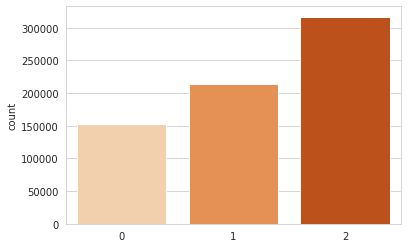

In [30]:
#Label counts for n_clusters=3 for 'Total Compensation' vs 'Total Benefits'

sns.countplot(x=kmeans1.labels_, palette='Oranges')
plt.show()

#seems very similar to the previous count just different label clusters

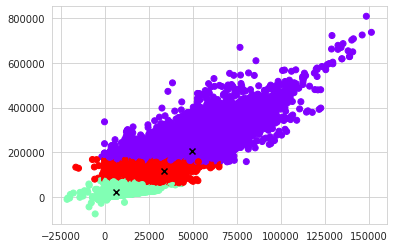

In [31]:
#K-means for n_clusters=3 for 'Total Compensation' vs 'Total Benefits'

plt.scatter(data3.iloc[:,0].values,data3.iloc[:,1].values, c=kmeans1.labels_, cmap="rainbow")
centers = np.array(kmeans1.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#Although the scatter plot looks very different, the results are similar when using either of the 
#independent variable column. 

Although the 'Union Code' column looks a little too uniform compare 
to the 'Total Benefits' column, the 'Union Code' column is the least dependent of 
all possible independent variables. We will continue the rest of the notebook using 
'Union Code' because results seem acceptable when comparing both situations.

**Determining The Optimal Number Of Clusters**

In [32]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [33]:
K = range(1,10)
X = data2
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

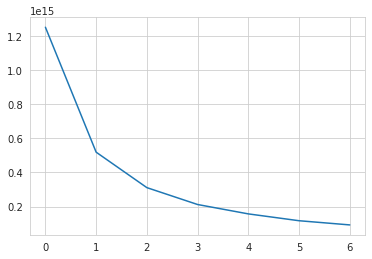

In [34]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [35]:
from sklearn.metrics import silhouette_samples,silhouette_score

the elbow method and by eye balling it, the best score is n=3, which is what we started using anyway.

**Try answering the below questions to stay on the right track for solving the assignment**

Do you need to reduce the number of columns?

Yes, only one independent and one dependent are needed for k-means.
I went with what I believe what would be the most important dependent variable,
because many columns could serve as a dependent variable.
For my independendt varibale I went with what I believe was the least coupled column,
although the scatter plot came out stranged, it had similar result using other column convinations. 

Is your data clean?

Not initially, but I cleaned it up by removing missing data. 
The rest of the data seemed fine.

Does your data has some interesting insights?

There is a huge wage gab, about 20% make up to $100k, 30% make between 100k-200k, 
and the remainder makes more than 200k upwards in the 800k. With such different orders of magniture,
it is hard to eliminate any outliears because the data is so improportionate. 

I didn't catch the objective of improving worker's benefits, by looking at scatter plots, benefits
go hand in hand with total compensation. Since I've alreadycompared total compensation with total benefits, 
I will compare Union Code and Total Benefits to see if there might be a difference.

In [37]:
#Total Benefits vs Union Code
data4=data1.drop(['Organization Group Code', 'Year', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Compensation'], axis=1)
data4.head()

,Union Code,Total Benefits
0,21.0,27747.13
1,21.0,22216.82
2,21.0,30116.78
3,21.0,40021.45
4,21.0,2428.31


In [38]:
from sklearn.cluster import KMeans

# k-means with some arbitrary k
kmeans2 = KMeans(n_clusters=3, max_iter=50)
kmeans2.fit(data4)

#n-cluster center points
print(kmeans2.cluster_centers_)

#These numbers will not reflect previous numbers because we are using a different 
#dependent variable when it comes cordinate placemen.

[[  496.87364468 33442.56610267]
 [  552.27495323  5859.43751304]
 [  399.46515713 50602.1320351 ]]


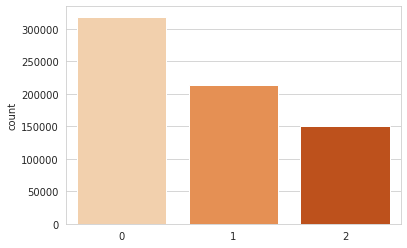

In [39]:
#Label counts for n_clusters=3 for 'Union Code' vs 'Total Benefits'

sns.countplot(x=kmeans2.labels_, palette='Oranges')
plt.show()

#Although we are using completely different dependent variable, the benefits are 
#very similar to those of the total compensation, meaning that both 'Total Compensation'
#'Total Benefits' are proportional to each other; hence, why I didnt want to use them
#to compare each other.

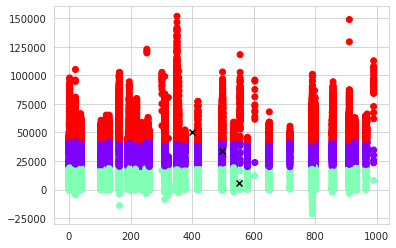

In [40]:
#K-means for n_clusters=3 for 'Union Code' vs 'Total Benefits'

plt.scatter(data4.iloc[:,0].values,data4.iloc[:,1].values, c=kmeans2.labels_, cmap="rainbow")
centers = np.array(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

#Although the group counts are similar across the board, the total benefits don't as spread out as the
#total compesantion. Benefits seem to have a cap while salaries seem as if they have bigger outliers.

Doing Different comparisons, we realize that benefits are proportional to ones total compensation. It seems people compensated at 100k get around 25k in benefits, people making around 200k get around 45k in benefits, while people making around 500k get about 100k in benefits. Although the ratios slightly reduce with higher wages, it isn't by much.

I wasn't able to make the comparison for K-Means and Hierarchical clustering, the data would run for Hierarchical clustering.